# EY Portfolio Project 1 - Supervised Learning
This is a supervised learning project created by Eugene Yap for the purpose of demonstrating knowledge in being able to understand and use data science and machine learning tools and methodologies.    
This notebook will go through an end-to-end data science/ machine learning framework to train a model to predict whether a female has diabetes or not.  
This notebook will contain the following:  
1. Problem definition
2. Data
3. Model Evaluation Criteria
4. Feature Definition
5. Modeling
6. Tuning and Improvement
7. Evaluation & Conclusion

## 1 - Problem definition
**What is the problem?**  
Given a set of clinical data about a female, can we predict whether that female has diabetes or not?

**This type of problem is?**  
Classification. To determine, given a set of clinical data defined in the data dictionary below, whether it is likely that a female has diabetes or no diabetes.

## 2 - Data
**Data source**  
Data was taken from the _UCI Pima Indians Diabetes Database_ in Kaggle here: https://www.kaggle.com/uciml/pima-indians-diabetes-database

**Data Dictionary**  
This is a dictionary for the labels of the columns in the dataset:  
*_Pregnancies_*: Number of times pregnant  
*_Glucose_*: Plasma glucose concentration a 2 hours in an oral glucose tolerance test  
*_BloodPressure_*: Diastolic blood pressure (mm Hg)  
*_SkinThickness_*: Triceps skin fold thickness (mm)  
*_Insulin_*: 2-Hour serum insulin (mu U/ml)  
*_BMI_*: Body mass index (weight in kg/(height in m)^2)  
*_DiabetesPedigreeFunction_*: Diabetes pedigree function. A function which scores likelihood of diabetes based on family history.    
*_Age_*: Age (years)  
*_Outcome_*: Class variable (0 or 1) where 1 is positive for diabetes

## Required Imports
In order for the notebook to run properly, the cell immediately below should be run first before any other cells.

In [1]:
# Standard imports for data exploration/ manipulation and visualization
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Imports for modeling
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV

# Imports for evaluation
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report, plot_roc_curve

### 2.1. Data Exploration
Here, we'll take a look at the data set to get an idea of what available data we have that can be used for our supervised learning model.

In [2]:
# Import dataset
diabetes = pd.read_csv('data/pima-indians-diabetes-database.csv')

# Report of data set information
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
# Get general statistics on data set
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


####  2.1.1 - Count of Non-Diabetics vs. Diabetics in Sample

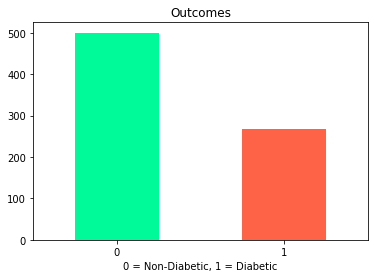

In [4]:
# Plot Count of Outcomes
diabetes['Outcome'].value_counts().plot(kind='bar', 
                                        color=['mediumspringgreen', 'tomato'],
                                       title='Outcomes')
diabetes['Outcome'].value_counts()
plt.xlabel('0 = Non-Diabetic, 1 = Diabetic');
plt.xticks(rotation=0);

**Observation:**  
34.89% of the sample have diabetes (268 /768).

#### 2.1.2 - Comparisons of Glucose & BMI between Non-Diabetics & Diabetics

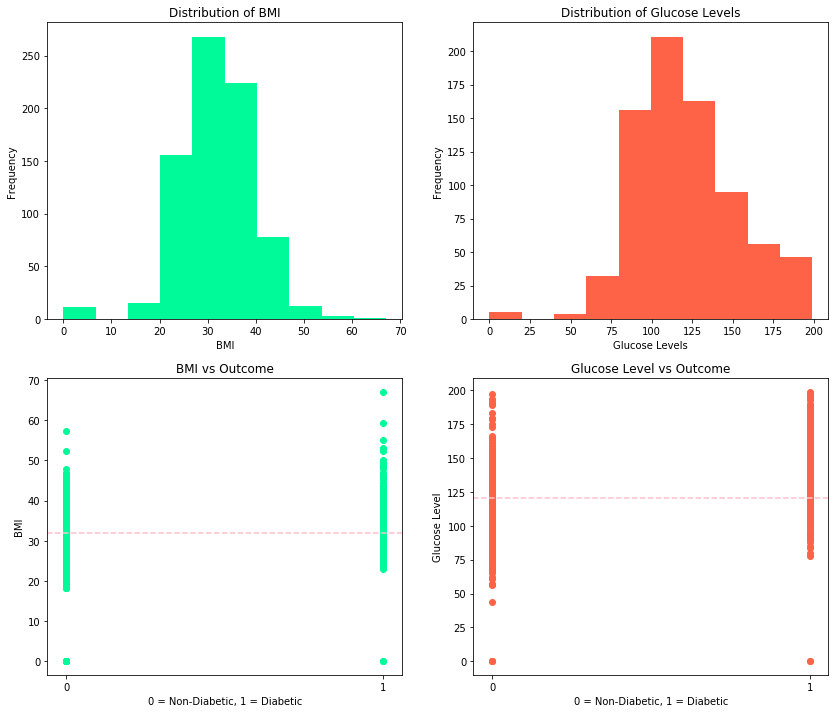

In [5]:
# Visualizations of data
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, 
                                             figsize=(14, 12))

# BMI distributions among dataset
ax1.hist(diabetes.BMI, color='mediumspringgreen')
ax1.set(title='Distribution of BMI',
      xlabel='BMI',
      ylabel='Frequency')

# Glucose level distributions among dataset
ax2.hist(diabetes.Glucose, color='tomato')
ax2.set(title='Distribution of Glucose Levels',
      xlabel='Glucose Levels',
      ylabel='Frequency')

# BMI Comparison Between Diabetics & Non-Diabteics
ax3.scatter(diabetes.Outcome, diabetes.BMI, c='mediumspringgreen')
ax3.set(title='BMI vs Outcome',
      xlabel='0 = Non-Diabetic, 1 = Diabetic',
      ylabel='BMI')

# Glucose Level Comparison Between Diabetics & Non-Diabteics
ax4.scatter(diabetes.Outcome, diabetes.Glucose, c='tomato')
ax4.set(title='Glucose Level vs Outcome',
      xlabel='0 = Non-Diabetic, 1 = Diabetic',
      ylabel='Glucose Level')

# Set xticks
ax3.set_xticks([0, 1]);
ax4.set_xticks([0, 1]);
# Set mean line
ax3.axhline(diabetes['BMI'].mean(), linestyle='--', color='pink');
ax4.axhline(diabetes['Glucose'].mean(), linestyle='--', color='pink');

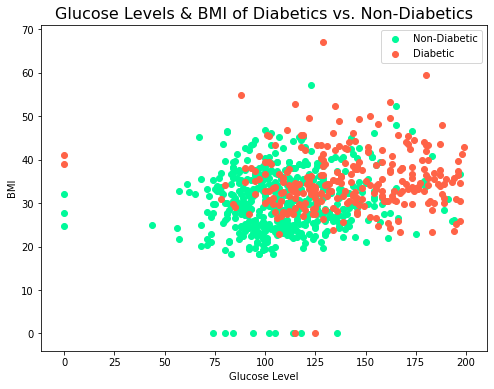

In [6]:
# Compare glucose levels & BMI between diabetics and non-diabetics
plt.figure(figsize=(8, 6))
plt.scatter(diabetes.Glucose[diabetes.Outcome == 0],
           diabetes.BMI[diabetes.Outcome == 0], c='mediumspringgreen')
plt.scatter(diabetes.Glucose[diabetes.Outcome == 1],
           diabetes.BMI[diabetes.Outcome == 1], c='tomato')
plt.xlabel('Glucose Level')
plt.ylabel('BMI')
plt.title('Glucose Levels & BMI of Diabetics vs. Non-Diabetics', fontsize=16)
plt.legend(['Non-Diabetic', 'Diabetic']);

**Observation:**  
Based on the data, can we assume that women with higher BMI and glucose levels have a greater chance of a diabetic outcome?

#### 2.1.3 - Correlation Matrix of Health Data to Outcome

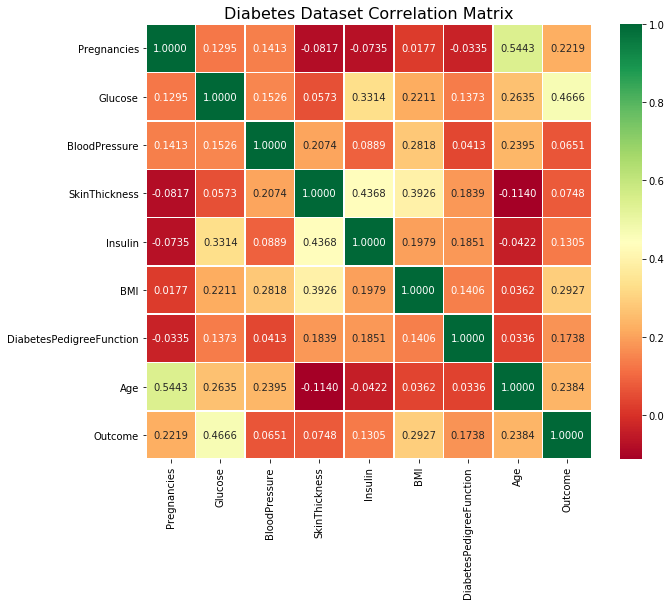

In [7]:
# Correlation matrix visualization via heatmap
diabetes_corr_matrix = diabetes.corr()
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(diabetes_corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt='.4f',
                cmap='RdYlGn');
plt.title("Diabetes Dataset Correlation Matrix", fontsize="16");

**Observation:**  
Glucose level and BMI are positively correlated with a diabetic outcome. Therefore, in combination with the data exploration and visualization performed, we can assume that the higher the glucose level and BMI of a patient, the higher the probability of a diabetic outcome.  
Interestingly, there is low to no correlation between blood pressure and a diabetic outcome.

## 3 - Model Evaluation Criteria
As diabetes is an illness that has a serious impact towards a patient's quality of life, early detection and treatment is important to reduce the risk of serious complications such as heart disease, stroke, blindness, limb amputations, kidney failure etc. Therefore, for this P.o.C., the evaluation metric will be the accuracy of the model being able to predict positive cases of diabetes in patients.  
**Evaluation Metric:**  
As the dataset is relatively balanced, for this P.o.C, we'll target a prediction accuracy of at least >0.80 (80%).  
**_Note:_**  
According to the forum thread on Kaggle here, https://www.kaggle.com/general/19387, the highest verifiable score is 77.99% using a Logistic Regression model with tuning and the average score is about 75% with tuning.

## 4 - Feature Definition
Here, we define the features that will be used to train the model to predict the target, which is whether a female patient has diabetes or not. We will be using the following features to train the model:  
* Pregnancies  
* Glucose  
* BloodPressure  
* SkinThickness  
* Insulin  
* BMI 
* DiabetesPedigreeFunction  
* Age

The model will try to predict the following result:  

Outcome:  
* 1 = Positive for diabetes  
* 0 = Negative for diabetes

## 5 - Modeling
Here, we'll perform the actions required to start modeling, these can be broken into the following steps:  
5.1. Data preparation  
5.2. Model selection  
5.3. Training the model  
5.4. Evaluating the baseline model

### 5.1 - Data Preparation
Here, we prepare the data to ensure that it is in a format and structure that can be used to train our model.

In [3]:
# Split features and target
X = diabetes.drop('Outcome', axis=1)
Y = diabetes['Outcome']

# Set random seed to ensure reproducibility
np.random.seed(39)

# Split into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Replace training set '0' values with mean values
X_train.replace({'Glucose':0}, 120, inplace=True)
X_train.replace({'BloodPressure':0}, 68.6, inplace=True)
X_train.replace({'SkinThickness':0}, 20.63843, inplace=True)
X_train.replace({'Insulin':0}, 80.237785, inplace=True)
X_train.replace({'BMI':0}, 31.7, inplace=True)

# Replace Test set '0' values with mean values
X_test.replace({'Glucose':0}, 122, inplace=True)
X_test.replace({'BloodPressure':0}, 71.0, inplace=True)
X_test.replace({'SkinThickness':0}, 20.12987, inplace=True)
X_test.replace({'Insulin':0}, 78.051948, inplace=True)
X_test.replace({'BMI':0}, 32.9, inplace=True)

### 5.2 - Model Selection
Once the data is in a format that we can use, we can decide on the type of models that we want to try using for our problem.  
As this is a classification problem, we'll use the following models as a baseline to determine which model we'll use as the final model for our problem:  
1. Linear SVC  
2. Logistic Regression  
2. K-nearest Neighbours  
3. Random Forest


For a primer on model selection, we can refer to Scikit-learn's _'Choosing the right estimator'_ documentation here https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html.

### 5.3 - Training The Model
Here, we'll train the models that we've selected in the previous step and then score them with our test split for our next step, which is to evaluate the models' performance.

In [4]:
# Instantiate selected models into a dictionary
models_dict = {
    'Linear SVC': LinearSVC(),
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Create function to train and evaluate selected models
def train_score_model(models_dict, X_train, X_test, Y_train, Y_test):
    """
    Trains a model taking the following parameters:
    models: A dictionary of the selected models.
    X_train: Feature training set.
    Y_train: Target training set.
    X_test: Feature test set.
    Y_test: Target test set.
    """
    # Set random seed to ensure reproducibility
    np.random.seed(39)
    # Create empty dictionary to store model scores
    scores = {}
    # Loop through dictinary to train and test models
    for name, model in models_dict.items():
        model.fit(X_train, Y_train)
        # This will only score using the model's default metrics
        scores[name] = model.score(X_test, Y_test)
    return scores

In [5]:
# Run train and test function
baseline_scores = train_score_model(models_dict, X_train, X_test, Y_train, Y_test)

### 5.4 - Evaluating The Baseline Models
We'll evaluate the results of the baseline models here and decide which model(s) we should drop or continue experimenting with and tuning for better scores.

{'Linear SVC': 0.6038961038961039,
 'Logistic Regression': 0.7402597402597403,
 'KNN': 0.6818181818181818,
 'Random Forest': 0.6883116883116883}

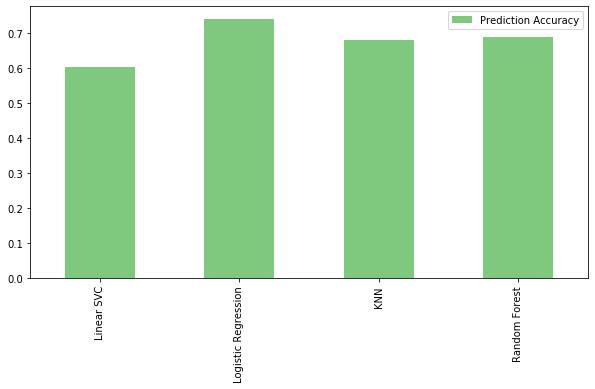

In [6]:
# Create baseline results dataframe
bls_df = pd.DataFrame(baseline_scores, index=['Prediction Accuracy'])
# Create baseline result plot
bls_df.T.plot.bar(figsize=(10,5), cmap='Accent')
baseline_scores

In [123]:
baseline_scores['Logistic Regression']

0.7402597402597403

**Results:**  
Based on the baseline model results above, we'll drop Linear SVC and work with the remaining models.  
The next step is to refine the choice of models by experimenting and tuning each model to determine which model we be using for the P.o.C.

## 6 - Tuning and Improvement 

### 6.1 - Manually Tuning The KNN Model Hyperparameters

In [7]:
# Create empty list for training and test scores
train_scores =[]
test_scores = []

# Create a list with different values of n-neighbours
neighbours = range(1, 21)

# Instantiate KNN
knn = KNeighborsClassifier()

# Loop through values in list neighbours
for i in neighbours:
    # Set random seed to ensure reproducibility
    np.random.seed(39)
    # Set n_neighbors to loop through range in neighbours
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, Y_train)
    # Updates 'train scores' array
    train_scores.append(knn.score(X_train, Y_train))
    # Updates 'test scores' array
    test_scores.append(knn.score(X_test, Y_test))

In [8]:
# Create dataframe to compare scores to number of n-neighbours in training and test
train_test_scores_df = pd.DataFrame()
train_test_scores_df['Training'] = train_scores
train_test_scores_df['Testing'] = test_scores
train_test_scores_df.head()

,Training,Testing
0,1.000000,0.636364
1,0.858306,0.636364
2,0.864821,0.629870
3,0.835505,0.655844
4,0.830619,0.681818


Maximum score on test data: 70.1299%


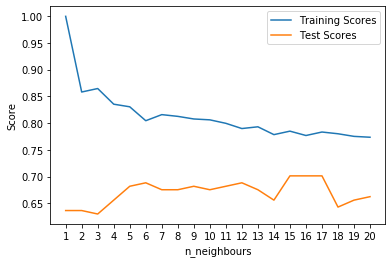

In [9]:
# Visulize KNN Hyperparameter manual tuning results
plt.plot(neighbours, train_scores, label= "Training Scores")
plt.plot(neighbours, test_scores, label= "Test Scores")
plt.xlabel('n_neighbours')
plt.ylabel('Score')
plt.xticks(np.arange(1, 21, 1))
plt.legend()
print(f'Maximum score on test data: {max(test_scores)*100:.4f}%');

### 6.2 - Tuning the Logistic Regression Model using `RandomizedSearchCV`

In [75]:
# Create a hyperparameter dictionary for Logistic Regression RSCV
logreg_rscv_grid = {
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear']
}

In [188]:
# Set random seed to ensure reproducibility
np.random.seed(39)

# Setup RSCV for Logistic Regression Model
logreg_rscv = RandomizedSearchCV(estimator=LogisticRegression(),
                                param_distributions=logreg_rscv_grid,
                                n_iter=20, 
                                cv=5,
                                verbose=True
                                )

# Fit RSCV for logistic regression
logreg_rscv.fit(X_train, Y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


In [189]:
# Check best hyperparameter settings from Logistic Regression RSCV
logreg_rscv.best_params_

{'solver': 'liblinear', 'C': 78.47599703514607}

In [190]:
# Check test score on tuned Logistic Regression RSCV model
logreg_rscv_score = logreg_rscv.score(X_test, Y_test)
print(f'The RSCV tuned log reg model scored {logreg_rscv_score*100:.4f}% in accuracy')
print(f'The baseline log reg model scored {baseline_scores["Logistic Regression"]*100:.4f}% in accuracy')

The RSCV tuned log reg model scored 73.3766% in accuracy
The baseline log reg model scored 74.0260% in accuracy


### 6.3 - Tuning the Random Forest Classifier Model Using `RandomizedSearchCV`

In [181]:
# Create a hyperparameter dictionary for Random Forest Classifier RSCV
rfc_rscv_grid = {
    # Using a range of continuous distributions as recommended by Sklearn docs
    'n_estimators': np.arange(1, 1000, 50),
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': np.arange(2, 20, 10),
    'min_samples_leaf': np.arange(1, 20, 2)
}

In [191]:
# Set random seed to ensure reproducibility
np.random.seed(39)

# Setup RSCV for Random Forest Classifier Model
rf_rscv = RandomizedSearchCV(estimator=RandomForestClassifier(),
                                param_distributions=rfc_rscv_grid,
                                n_iter=20, 
                                cv=5,
                                verbose=True
                                )

# Fit RSCV for logistic regression
rf_rscv.fit(X_train, Y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   42.6s finished


In [192]:
# Check best hyperparameter settings from Random Forest RSCV
rf_rscv.best_params_

{'n_estimators': 151,
 'min_samples_split': 2,
 'min_samples_leaf': 5,
 'max_depth': 10}

In [193]:
# Check test score on tuned Random Forest RSCV model
rf_rscv_score = rf_rscv.score(X_test, Y_test)

# Check test score on tuned Random Forest RSCV model
print(f'The RSCV tuned Random Forest model scored {rf_rscv_score*100:.4f}% in accuracy')
print(f'The baseline Random Forest model scored {baseline_scores["Random Forest"]*100:.4f}% in accuracy')

The RSCV tuned Random Forest model scored 68.8312% in accuracy
The baseline Random Forest model scored 68.8312% in accuracy


**Outcome**  
After preliminary exploration by tuning hyperparameters manually and using `RandomizedSearchCV`, for the next step, we'll continue experimenting with the logistic regression model to attempt to achieve the required evaluation metric of 80% accuracy requirement to proceed with the P.o.C phase.

### 6.4 - Tuning The Logistic Regression Model Using `GridSearchCV`

In [208]:
# Create a hyperparameter dictionary for Logistic Regression GSCV
logreg_gscv_grid = {
    'C': np.logspace(-4, 4, 20)
}

In [209]:
# Set random seed to ensure reproducibility
np.random.seed(39)

# Setup GSCV for Logistic Regression Model
logreg_gscv = GridSearchCV(estimator=LogisticRegression(),
                                param_grid=logreg_gscv_grid, 
                                cv=5,
                                verbose=True
                                )

# Fit RSCV for logistic regression
logreg_gscv.fit(X_train, Y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.6s finished


In [210]:
# Check best hyperparameter settings from Random Forest RSCV
logreg_gscv.best_params_

{'C': 4.281332398719396}

In [211]:
# Check test score on tuned Logistic Regression RSCV model
logreg_gscv_score = logreg_gscv.score(X_test, Y_test)
print(f'The GSCV tuned log reg model scored {logreg_gscv_score*100:.4f}% in accuracy')
print(f'The baseline log reg model scored {baseline_scores["Logistic Regression"]*100:.4f}% in accuracy')

The GSCV tuned log reg model scored 73.3766% in accuracy
The baseline log reg model scored 74.0260% in accuracy


**Outcome**  
After attempting to improve the accuracy score by tuning the hyperparameters of our Logistic Regression model, the baseline logistic regression model remains the best scoring in accuracy.  
However, it has failed to achieve the 80% accuracy required to continue with a P.o.C phase, therefore, we will move on to reporting our findings and conclusions next.

In [98]:
# Setup Baseline Logistic Regression Model
# Set random seed to ensure reproducibility
np.random.seed(39)

# Create a empty dictionary
logreg_base_grid = {

}

# Setup GSCV for Logistic Regression Model
logreg_base = LogisticRegression()

# Fit RSCV for logistic regression
logreg_base.fit(X_train, Y_train);

## 7 - Evaluation & Conclusion

In [99]:
# Create predictions
Y_preds = logreg_base.predict(X_test)

### 7.1 - ROC and AUC score

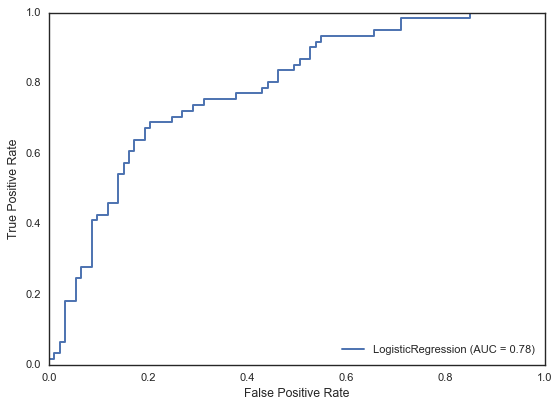

In [103]:
# Plot ROC curve and get AUC score
plot_roc_curve(logreg_base, X_test, Y_test);

**Observation**  
AUC (True positives vs false postives) is 0.78 which is relatively good considering the default accuracy metric scored the model at 0.74.

### 7.2 - Confusion Matrix

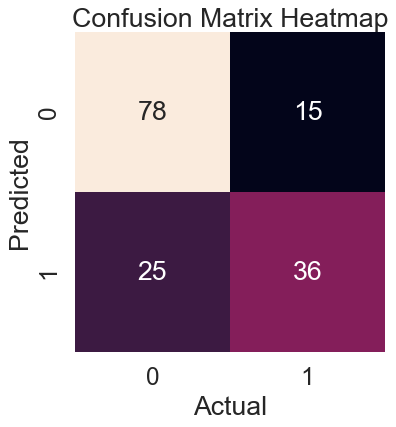

In [104]:
# Create fn for Confusion Matrix visualization
def conf_matrix(test, prediction):
    """
    Plots a confusion matrix using Seaborn's '.heatmap()' function
    """
    sns.set(font_scale=2)
    fig, ax = plt.subplots(figsize=(5, 5))
    ax = sns.heatmap(confusion_matrix(Y_test, Y_preds),
                     annot=True,
                     cbar=False)
    # Customise plot
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Confusion Matrix Heatmap')

# Call function
conf_matrix(Y_test, Y_preds)

### 7.3 - Model Performance Reports

In [105]:
# Get baseline Classification report
print(classification_report(Y_test, Y_preds))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80        93
           1       0.71      0.59      0.64        61

    accuracy                           0.74       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.74      0.74      0.74       154



**Observation**  
Looking at the Confusion Matrix and the initial Classification Report, it seems the model is performing well at predicting true negatives (i.e. patients that do not have diabetes) but also a high rate of false negatives. We could explore further to find some ways to decrease the number of false negatives predicted by our model (e.g. obtaining more samples?)

#### 7.3.1 - Cross-Validated Score Report
Here, we'll get the scores for the model using Cross-Validation.

In [106]:
# Set random seed to ensure reproducibility
np.random.seed(39)

# Functionalize this part below:
# Run cross-validation score function for accuracy
logreg_base_cv_acc = cross_val_score(logreg_base, X, Y, cv=5, scoring='accuracy')
# Run cross-validation score function for precision
logreg_base_cv_pre = cross_val_score(logreg_base, X, Y, cv=5, scoring='precision')
# Run cross-validation score function for recall
logreg_base_cv_rec = cross_val_score(logreg_base, X, Y, cv=5, scoring='recall')
# Run cross-validation score function for f1
logreg_base_cv_f1 = cross_val_score(logreg_base, X, Y, cv=5, scoring='f1')

# Get mean scores across 10 CV splits
logreg_base_cv_acc_mean = logreg_base_cv_acc.mean()
logreg_base_cv_pre_mean = logreg_base_cv_pre.mean()
logreg_base_cv_rec_mean = logreg_base_cv_rec.mean()
logreg_base_cv_f1_mean = logreg_base_cv_f1.mean()

The 5-fold cross-validated accuracy is 0.7696
The 5-fold cross-validated precision is 0.7182
The 5-fold cross-validated recall is 0.5635
The 5-fold cross-validated f1-score is 0.7696


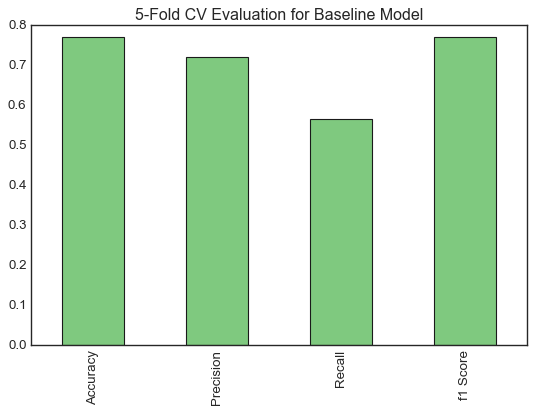

In [125]:
# Create visualization for CV evaluated metrics
logreg_base_cv_vis = pd.DataFrame({'Accuracy': logreg_base_cv_acc_mean,
                                  'Precision': logreg_base_cv_pre_mean,
                                  'Recall': logreg_base_cv_rec_mean,
                                  'f1 Score': logreg_base_cv_acc_mean}, index= [0])
logreg_base_cv_vis.T.plot.bar(title='5-Fold CV Evaluation for Baseline Model',
                              figsize=(8, 5), cmap='Accent', legend=False)
plt.style.use('seaborn-white')

# Display mean scores across 5 CV splits
print(f'The 5-fold cross-validated accuracy is {logreg_base_cv_acc_mean:.4f}')
print(f'The 5-fold cross-validated precision is {logreg_base_cv_pre_mean:.4f}')
print(f'The 5-fold cross-validated recall is {logreg_base_cv_rec_mean:.4f}')
print(f'The 5-fold cross-validated f1-score is {logreg_base_cv_acc_mean:.4f}')

### 7.4 - Feature Importance

{'Pregnancies': 0.11893955188811174, 'Glucose': 0.04567052638339512, 'BloodPressure': -0.023047200592634577, 'SkinThickness': -0.011215823271794248, 'Insulin': -0.0014384052711128074, 'BMI': 0.12469337867255428, 'DiabetesPedigreeFunction': 1.250689609817002, 'Age': 0.01860357256275455}


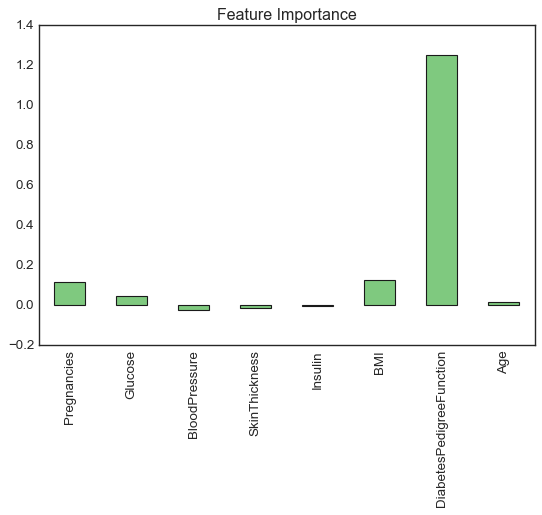

In [124]:
# Get coefficients from model
logreg_base.coef_

# Map features to returned coef_ array by creating a dictionary
logreg_coef_dict = dict(zip(diabetes.columns, list(logreg_base.coef_[0])))
print(logreg_coef_dict)

# Visualize feature importance
logreg_coef_vis = pd.DataFrame(logreg_coef_dict, index=[0])
logreg_coef_vis.T.plot.bar(title='Feature Importance',
                              figsize=(8, 5), cmap='Accent', legend=False);
plt.style.use('seaborn-white')

**Observation**  
'DiabetesPedigreeFunction', which is a function that scores the likelihood of diabetes based on family history seems to be strongly related to our model's ability to predict diabetes. We may want to learn more about how this function is derived to see if this is true and/ or how we could improve the model further. Also, we may try dropping 'SkinThickness' & 'BloodPressure' as features and test to see how it affects our model's performance.

### 7.5 - Conclusion
As the model performed below the 80% requirement for the P.o.C to move forward at this time, the next steps taken would be:  
1. Present these findings during the next meeting to decide if we should continue running experiments to tune the model & features so that it reaches the required 80% accuracy or if the evaluation metric should be re-considered.
2. If go-ahead is given to continue tuning to reach 80% threshold, gather team to find out cause of high number of false negatives and resolution and also how 'DiabetesPedigreeFunction' is derived.
3. Drop the features with low coeffieicents to test how it affects model performance.
4. Drop features individually but keep 'DiabetesPedigreeFunction' to test how it affects model performance.
5. Re-visit using other models.
6. See if we're able to obtain more data and re-train the models.